# Exploratory Data Analysis 

# Problem statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

# About the data
The dataset was generated by IBM in order to analyze all relevant customer data and develop focused customer retention programs. The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113


# todo EDA:
- total charges depending on tenure? is it leaking?
- Better visualisation for all feature distributions

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Import custom functions from utils file
from utils import *

# Set display options for data exploratory analysis
pd.set_option('display.max_columns', None)


In [27]:
# Read data
df = pd.read_csv('churn_cleaned_df.csv')

# Data visualisation
Correlation analysis is a statistical technique that allows us to measure the strength and direction of the relationship between two variables. In the context of customer churn, it can help us identify which factors are most closely associated with customer attrition. By identifying these factors, we can gain insights into the underlying drivers of churn and potentially intervene to improve customer retention. Ultimately, a better understanding of the factors driving churn can help businesses make more informed decisions and take proactive steps to reduce customer attrition and drive long-term growth.

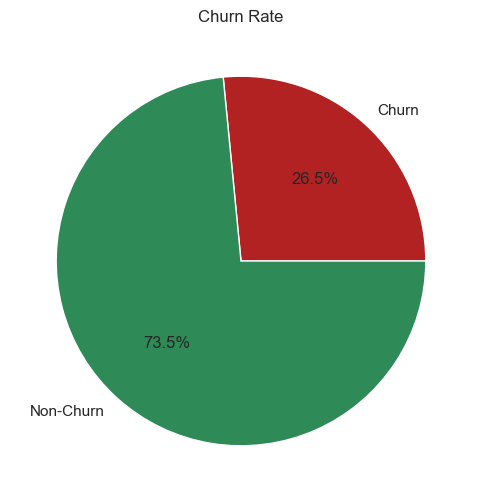

In [28]:
# Calculate the churn and non-churn counts
churn_count = df[df['Churn'] == 1].customerID.nunique()
non_churn_count = df[df['Churn'] == 0].customerID.nunique()

# Set up the plot size and title
plt.figure(figsize=(8, 6))
plt.title('Churn Rate')

# Set the colors for the chart section
colors = ['firebrick', 'seagreen']

# Create the pie chart
plt.pie([churn_count, non_churn_count], labels=['Churn', 'Non-Churn'], autopct='%1.1f%%', colors=colors)

# Display the plot
plt.show()


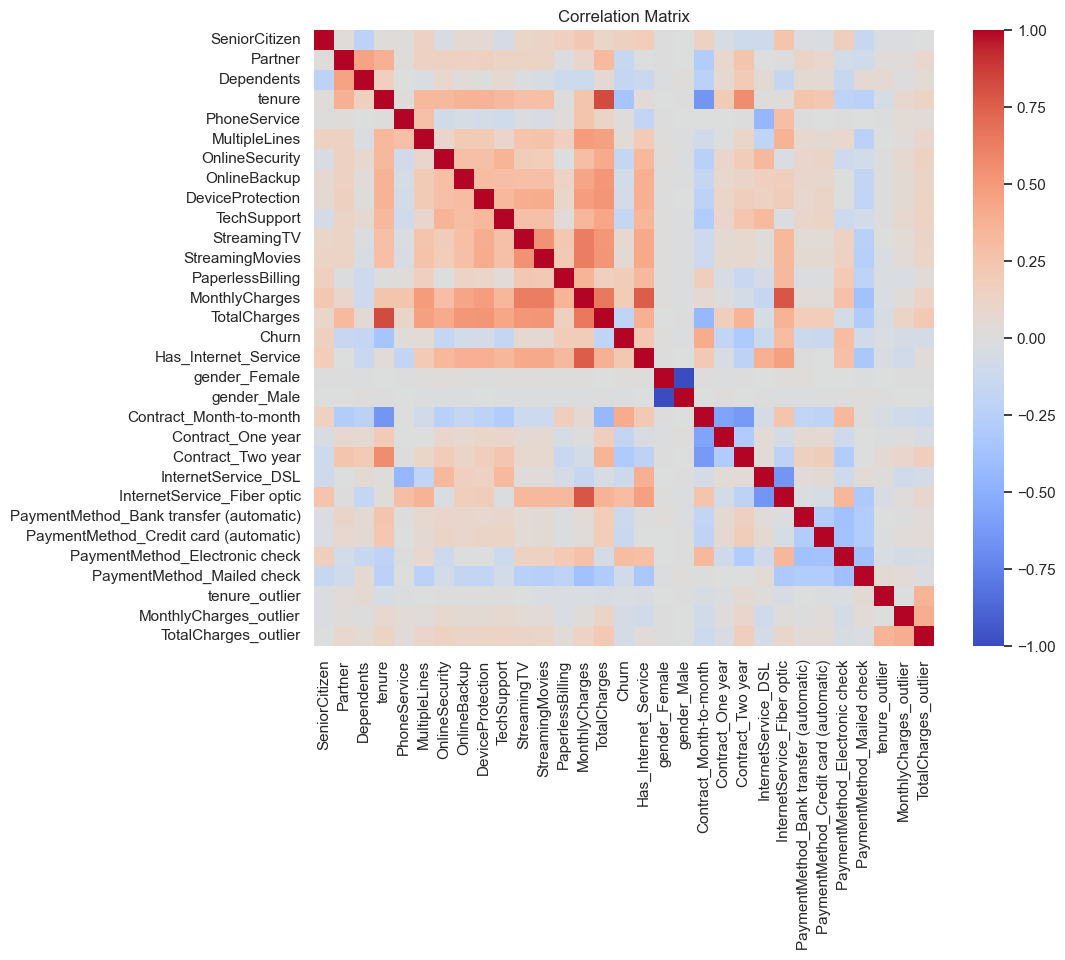

In [29]:
# Create a correlation matrix
corr_matrix = df.corr()

# Set up the plot size
sns.set(rc={'figure.figsize':(10,8)})

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')

# Display the plot
plt.show()


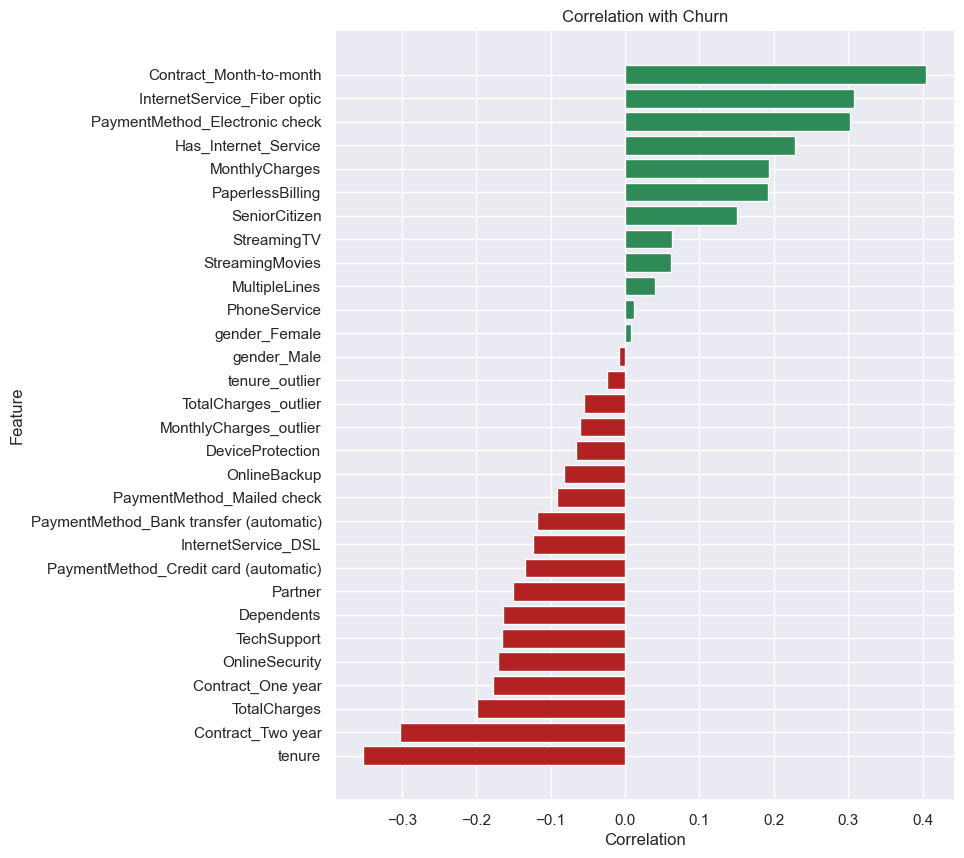

In [30]:
# Calculate pairwise correlation values between 'churn' column and all other columns
corr_churn = df.corr()['Churn']

# Load your correlation data into a pandas dataframe
corr_df = pd.DataFrame({'Feature': corr_churn.index, 'Correlation': corr_churn.values})

# Remove the 'Churn' feature from the dataframe
corr_df = corr_df[corr_df['Feature'] != 'Churn']

# Sort the dataframe by correlation values
sorted_corr_df = corr_df.sort_values(by='Correlation')

# Extract the feature names and correlation values as numpy arrays
features = sorted_corr_df['Feature'].values
corr_values = sorted_corr_df['Correlation'].values

# Assign colors to the bars based on their values
colors = np.where(corr_values > 0, 'seagreen', 'firebrick')

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 10))

# Plot the horizontal bar chart
ax.barh(features, corr_values, color=colors)

# Add labels and title to the plot
ax.set_xlabel('Correlation')
ax.set_ylabel('Feature')
ax.set_title('Correlation with Churn')

plt.show()


The positive correlation of the "Contract_Month-to-month" feature with churn means that customers who are on a monthly contract are more likely to churn than customers who are on a longer-term contract. This could be because customers on monthly contracts have more flexibility to switch providers without penalties or fees, compared to those on longer-term contracts.

The negative correlation of "tenure" with churn means that the longer a customer has been with a provider, the less likely they are to churn. This could be because customers who have been with a provider for a longer period of time have become more loyal, or have built up a greater level of satisfaction with the service over time.

We can display the top correlation features in absolute values in order to have a more informative view.

In [31]:
# Create correlation between Churn and other features ordered
#  by absolute correlation descending 

# Load your correlation data into a pandas dataframe
corr_df = pd.DataFrame({'Feature': corr_churn.index, 'Correlation': corr_churn.values})

# Remove the 'Churn' feature from the dataframe
corr_df = corr_df[corr_df['Feature'] != 'Churn']

# Round correlation values
corr_df['Correlation'] = round(corr_df['Correlation'], 2)

# Add a new column with absolute correlation values
corr_df['Abs_Correlation'] = abs(corr_df['Correlation'])

# Sort the dataframe by absolute correlation values
sorted_corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False).reset_index(drop=True)

# Display the sorted dataframe
sorted_corr_df[['Feature', 'Correlation']].head(10)


,Feature,Correlation
0,Contract_Month-to-month,0.41
1,tenure,-0.35
2,InternetService_Fiber optic,0.31
3,PaymentMethod_Electronic check,0.30
4,Contract_Two year,-0.30
5,Has_Internet_Service,0.23
6,TotalCharges,-0.20
7,PaperlessBilling,0.19
8,MonthlyCharges,0.19
9,Contract_One year,-0.18


# Identifying different segments of customers
In this section we are analysing in a more detailed way the insights from the correlation matrix. This will help us understand better why some features are highly predictive and what we can expect from a combination of them. For example, are senior citizens more or less likely to churn? After how many charges are customers reducing their likelihood to churn?

### How to read the following charts?
The stacked bar charts show already cleaned data for our upcoming modelling part. Therefore, it may be strange at first to understand a chart that illustrates churn rates based on 1's and 0's. Across all visualisations, "1" means that this specific user is part of a group. For example, if a user's SeniorCitizen is 1, it means that it is a senior citizen. Otherwise, if user is 0, it means it is not a senior citizen.

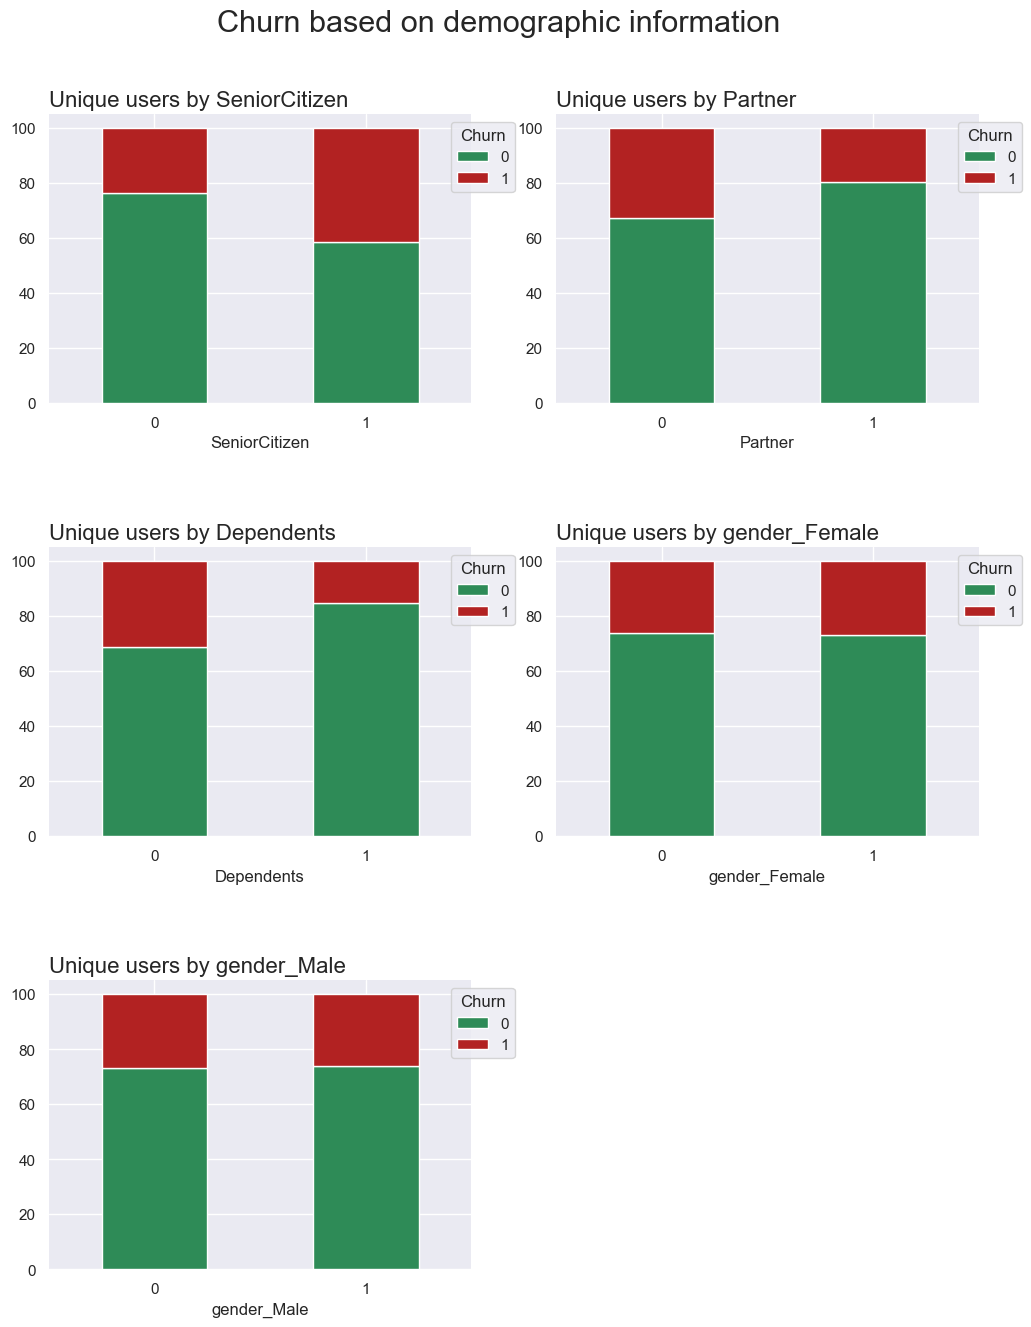

In [32]:
# demographic column names
demographic_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'gender_Female', 'gender_Male']

# stacked plot of demographic columns
percentage_stacked_plot(df, demographic_columns, 'Churn based on demographic information')

Based on the chart displayed above, we can observe that gender alone does not show great differences between male and female. However, senior citizens churn more (~40% senior citizens churn) and users without partner and dependents independently more.

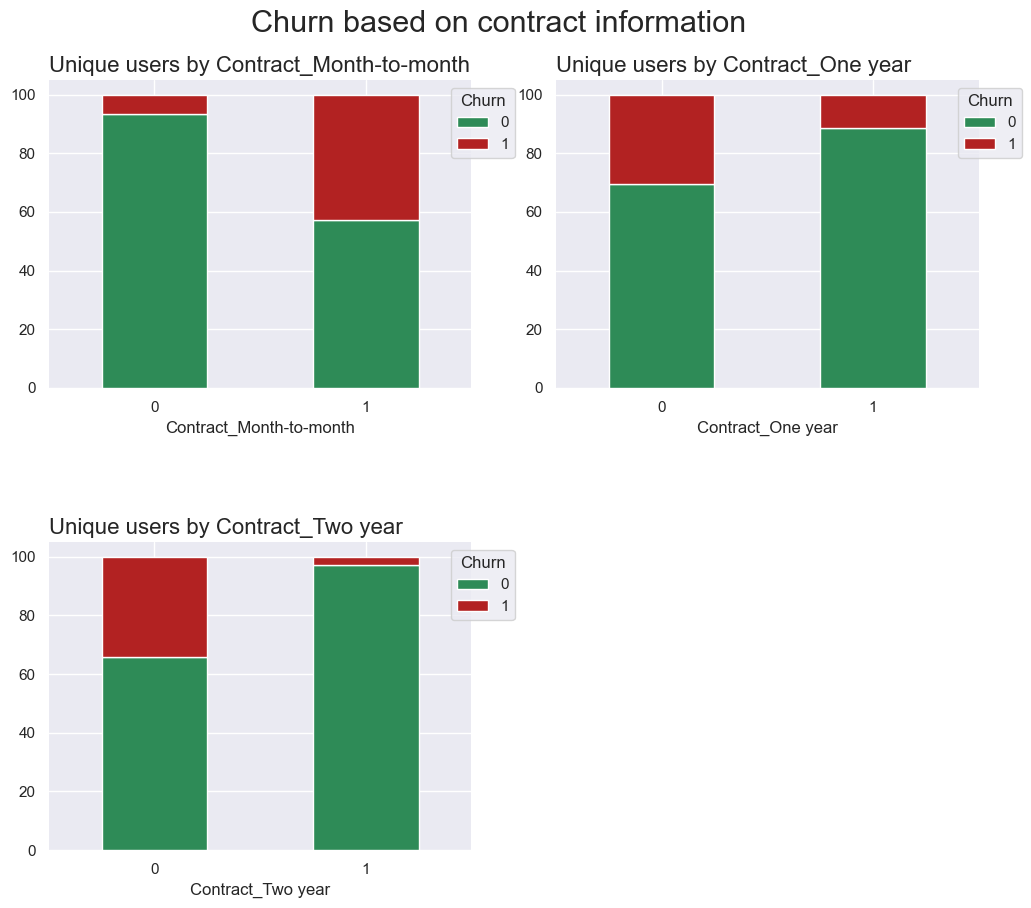

In [33]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

account_columns = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']

# stacked plot of customer account columns
percentage_stacked_plot(df, account_columns, 'Churn based on contract information')

We can discern a distinct trend based on the contract type: the greater the duration of contracts signed with the user, the lower the likelihood of churn. The ```Contract_Month-to-month``` column shows that ~40% of the users with that type of contract, churn.

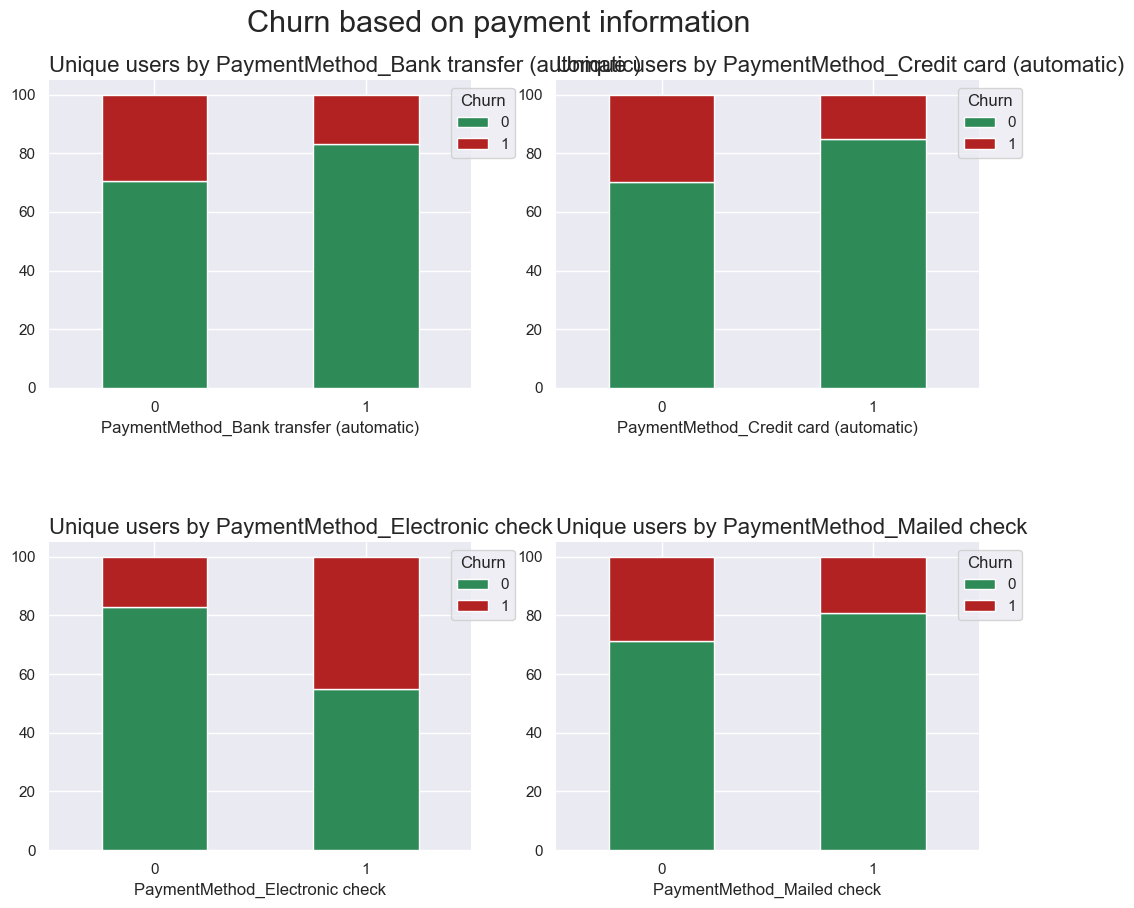

In [34]:
# services column names
services_columns = ['PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# stacked plot of services columns
percentage_stacked_plot(df, services_columns, 'Churn based on payment information')

Contract type isn't the sole factor distinguishing churned users; payment method also plays a crucial role. Users who opt for automatic payments tend to exhibit considerably lower churn rates compared to those who choose manual payment methods. Especially, ```PaymentMethod_Electronic check``` column shows that ~40% users with that type of payment churn. 

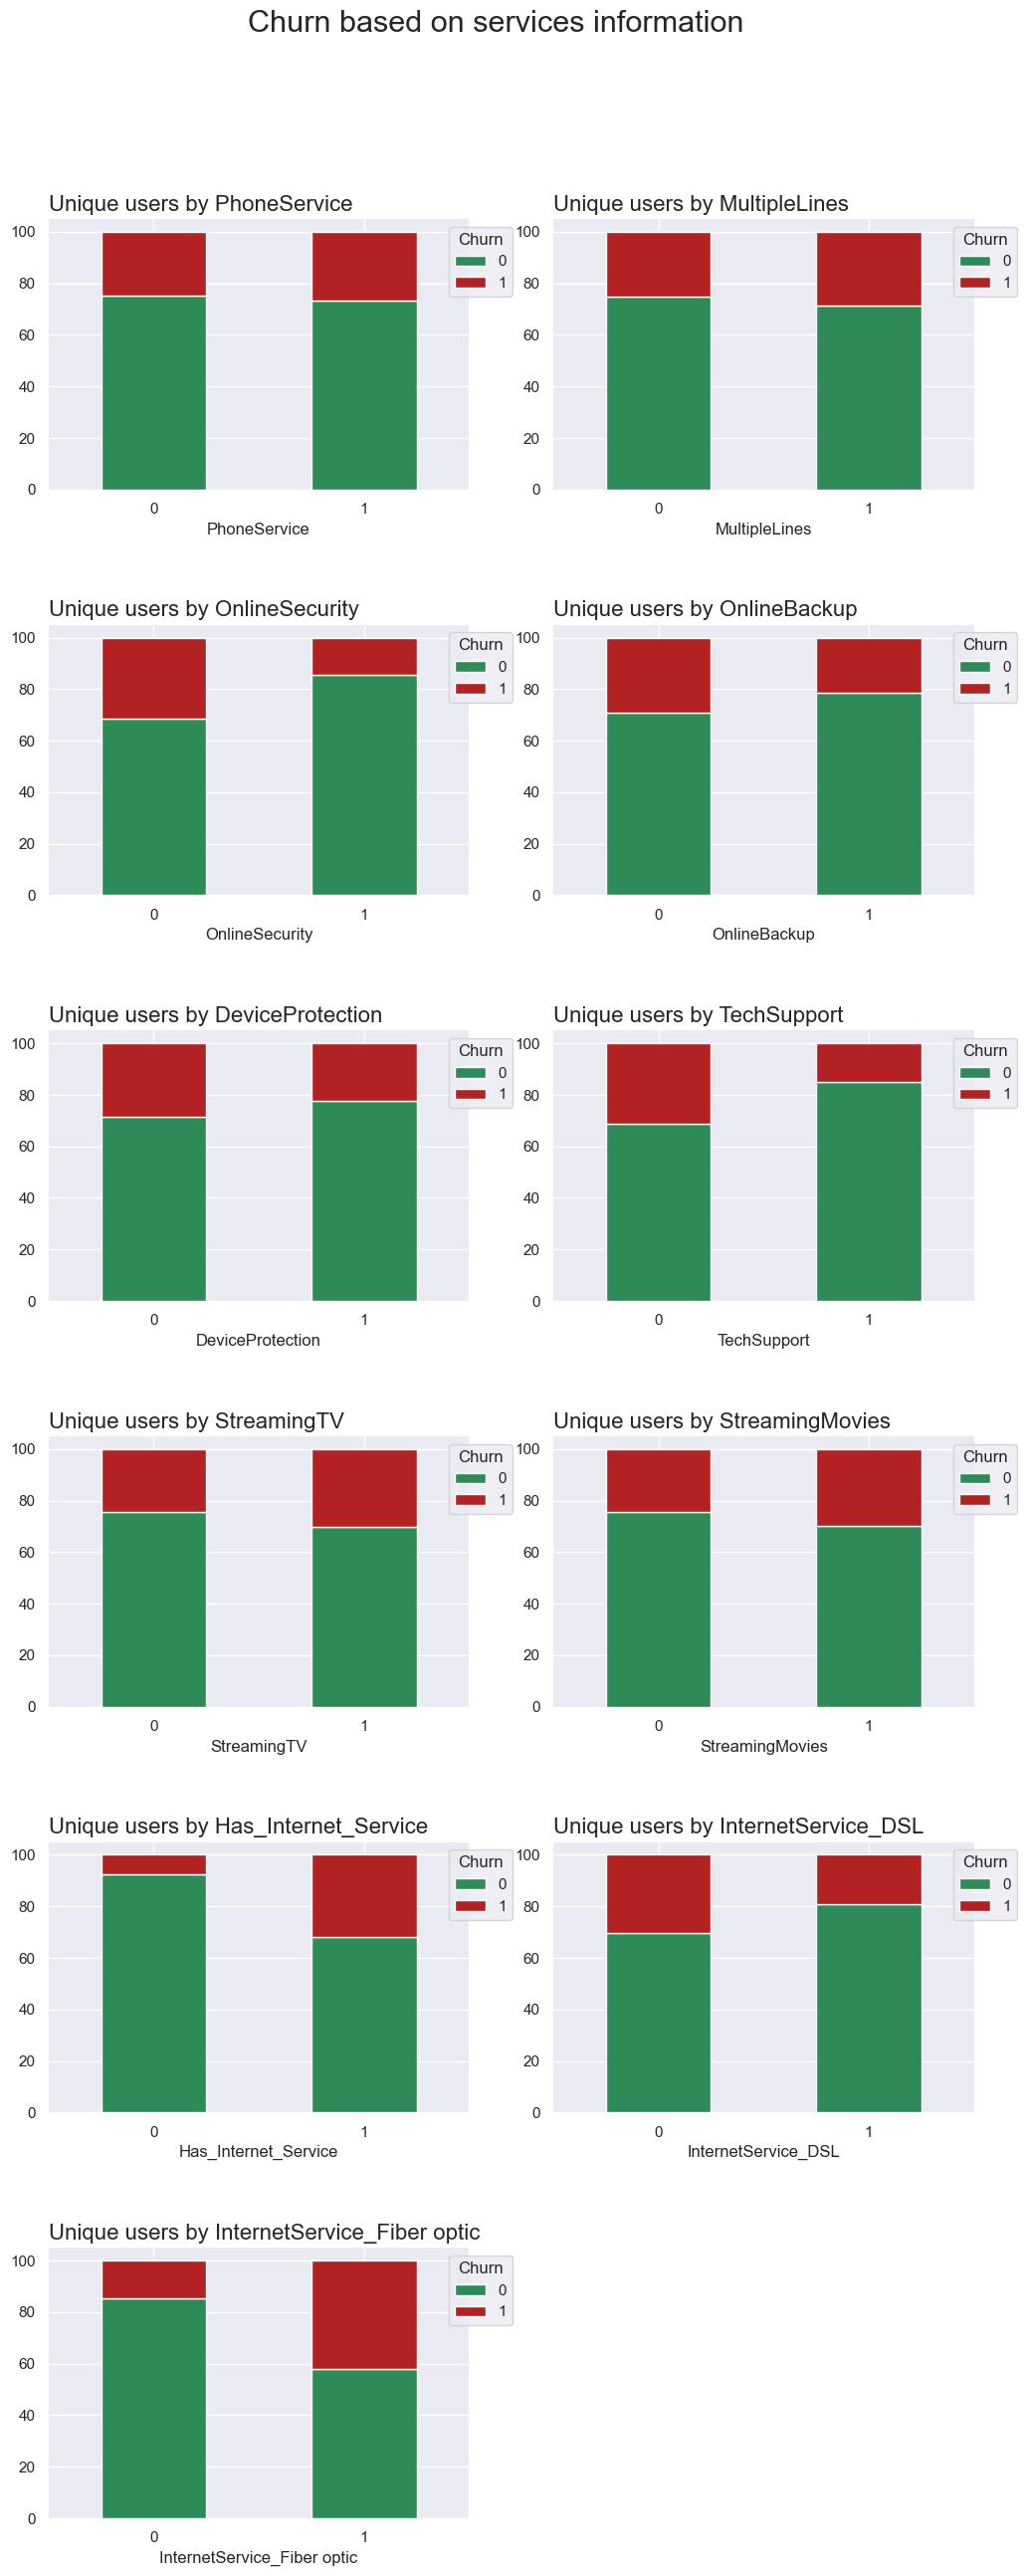

In [35]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Has_Internet_Service',
       'InternetService_DSL', 'InternetService_Fiber optic']

# stacked plot of services columns
percentage_stacked_plot(df, services_columns, 'Churn based on services information')

Contracted services don't exhibit deterministic churn factors, yet intriguing patterns emerge. For instance, users with ```OnlineSecurity``` experience lower churn rates compared to those without it. Similar trends are observed with ```InternetService_DSL```, ```OnlineBackup```, and ```TechSupport```. We should try to offer these services for potential leads in order to reduce our future churn. However, a contrary effect is noticeable with ```InternetService_Fiber optic```.

### User Distribution Based on Charges Analysis
Upon examining the ```TotalCharges``` chart, a significant concentration of users becomes evident on the left side. This pattern suggests a sizeable portion of users either had short-lived memberships or made minimal contributions to long-term revenue. Furthermore, an additional trend emerges with the ```MonthlyCharges``` chart, reinforcing the previous observation: a majority of users gravitate towards lower monthly charges. This emphasizes that a substantial user group opts for cost-effective options. 

However, the analysis reveals an intriguing exception – a cluster of users with monthly charges hovering around $80. This distinct group signifies a segment of customers seeking enhanced value and premium services from the business.

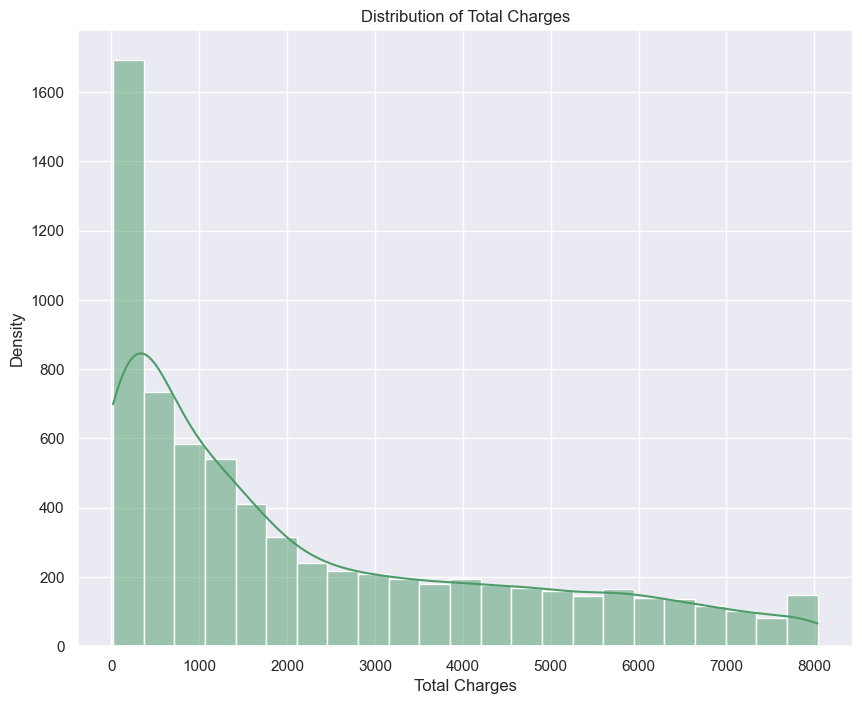

In [42]:
# Create distribution plot
sns.histplot(df['TotalCharges'], kde=True, color='#4C9B68')

# Set chart title and axis labels
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Density')

# Show the chart
plt.show()

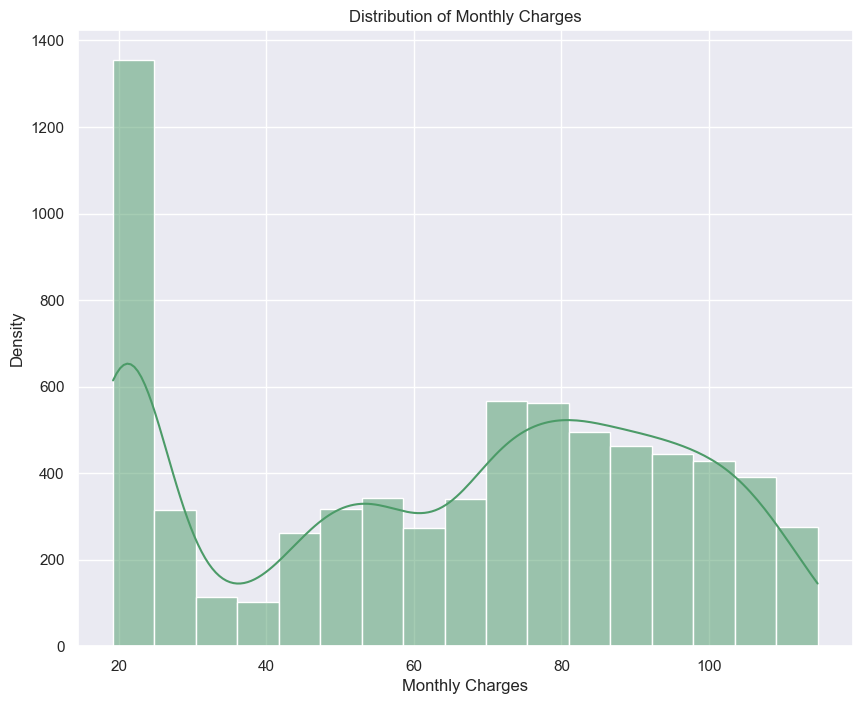

In [41]:
# Create distribution plot
sns.histplot(df['MonthlyCharges'], kde=True, color='#4C9B68')

# Set chart title and axis labels
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')

# Show the chart
plt.show()